In [1]:
"""
Preamble for most code and jupyter notebooks
@author: bridgetsmart
@notebook date: 4 Nov 2025
"""

import numpy as np, pandas as pd

import matplotlib.pyplot as plt, seaborn as sns
import matplotlib as mpl

import math, string, re, pickle, json, time, os, sys, datetime, itertools

from tqdm.notebook import tqdm

from functions.simulating_hawkes import gen_poisson_ih
from functions.cross_correlogram import run_single_test, smooth_example_plot

## Generate data

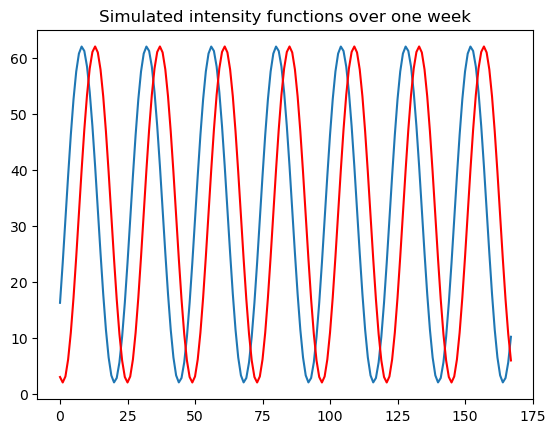

In [2]:

n_bins_per_unit = 4 # hist bin width is 15 seconds
delta = 1/n_bins_per_unit

tag_A ="A"
tag_B = "B"

T_max = 30*24 # over 30 days
T = T_max
l_av = 1.01 # average rate

win = 3 # 3 hours
delta = 0.25 # 15 minutes
def lambda_s(x):
    return 30*(np.sin((x)/(24/(2*np.pi))+(18/(np.pi)))+1.07) # period of one day

def lambda_t(x):
    return 30*(np.sin((x)/(24/(2*np.pi))+(14/(np.pi)))+1.07) # period of one day out by a bit


x_ = np.arange(0,7*24)#T_max,100) # one week
plt.title('Simulated intensity functions over one week')
sns.lineplot(x=x_,y=lambda_s(x_),color='#1f77b4')
sns.lineplot(x=x_,y=lambda_t(x_),color='r')

d = []

t1 = gen_poisson_ih(lambda_s, T_max);
t2 = gen_poisson_ih(lambda_t, T_max);

In [3]:
df = pd.DataFrame({'tag':len(t1)*['A']+len(t2)*['B'], 'time':list(t1)+list(t2)})

# process times
df['hours'] = np.floor(df.time)
df['hour'] = np.mod(df.hours,24)

## Circadian / TOD model test

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/bridgetsmart/Documents/GitHub/temporal_profiles/functions/cross_correlogram.py:293: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(term, w, T-w)[0] # integral from si+hj to si+hj+delta of lambda_S * E[events from T]


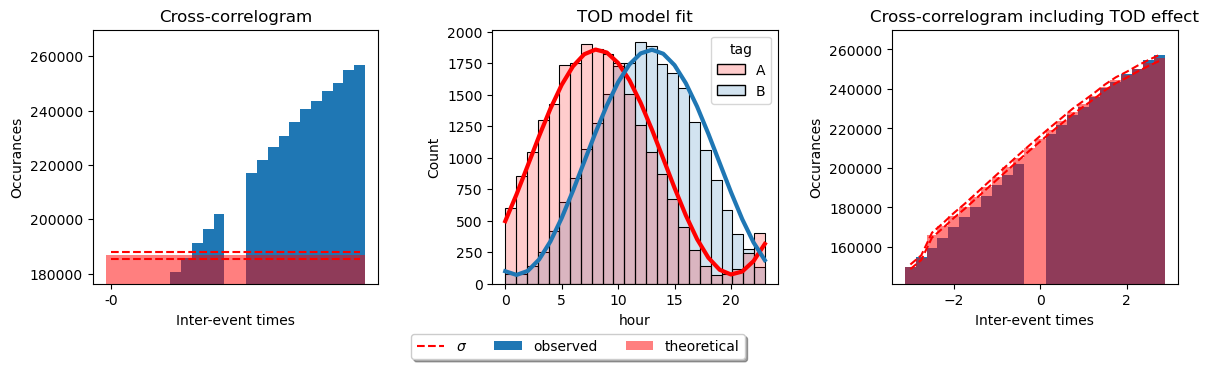

In [6]:
H, bins, u, l, u2, l2 = run_single_test(t1, t2, df, win, delta, T_max)

## Empirical smooth null model

/Users/bridgetsmart/Documents/GitHub/temporal_profiles/functions/cross_correlogram.py:293: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(term, w, T-w)[0] # integral from si+hj to si+hj+delta of lambda_S * E[events from T]


True

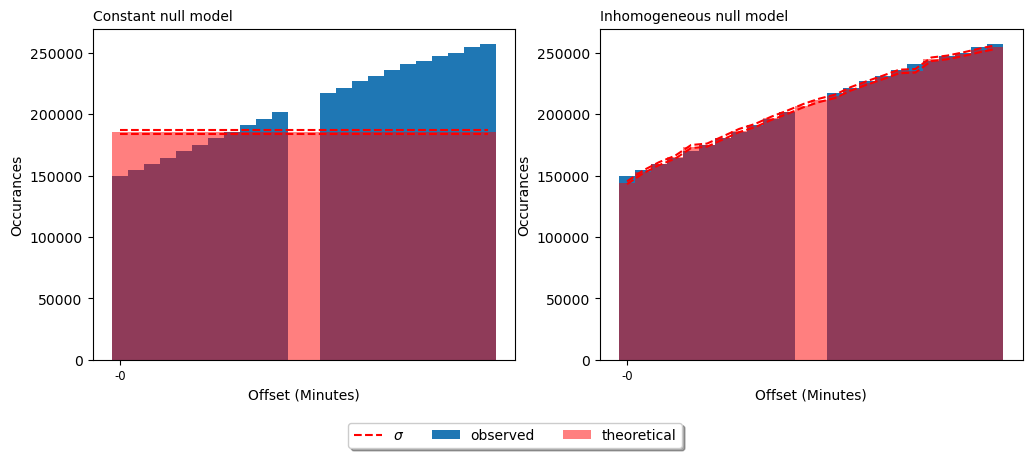

In [5]:
smooth_example_plot(t1,t2, win, delta, T, interval_size=1, factor_red = 8)